<a href="https://colab.research.google.com/github/legion2002/HelloGit/blob/master/AlgoTradingFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
API_TOKEN = 'FL3XVWNCPFOKRTOJ'
stock = 'RELIANCE>BSE'
API_BASE = f'https://www.alphavantage.co/query?'
SMA60dic = requests.get(f"https://www.alphavantage.co/query?function=SMA&symbol={stock}&interval=5min&time_period=60&series_type=open&apikey={API_TOKEN}").json()
SMA200dic = requests.get(f"https://www.alphavantage.co/query?function=SMA&symbol={stock}&interval=5min&time_period=200&series_type=open&apikey={API_TOKEN}").json()
pricedic = requests.get(f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={stock}&interval=5min&outputsize=full&apikey={API_TOKEN}").json()

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'MSFT', '3. Last Refreshed': '2021-05-10 20:00:00', '4. Interval': '5min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2021-05-10 20:00:00': {'1. open': '247.1200', '2. high': '247.1400', '3. low': '247.1200', '4. close': '247.1400', '5. volume': '1691'}, '2021-05-10 19:55:00': {'1. open': '246.9700', '2. high': '247.1600', '3. low': '246.8000', '4. close': '247.0000', '5. volume': '3094'}, '2021-05-10 19:50:00': {'1. open': '246.6900', '2. high': '246.9700', '3. low': '246.6900', '4. close': '246.9700', '5. volume': '4104'}, '2021-05-10 19:45:00': {'1. open': '246.6000', '2. high': '246.6500', '3. low': '246.6000', '4. close': '246.6500', '5. volume': '1234'}, '2021-05-10 19:40:00': {'1. open': '246.6000', '2. high': '246.7000', '3. low': '246.6000', '4. close': '246.7000', '5. volume': '3113'}, '2021-05-10 19:35:00': {'1. open': '246.6000

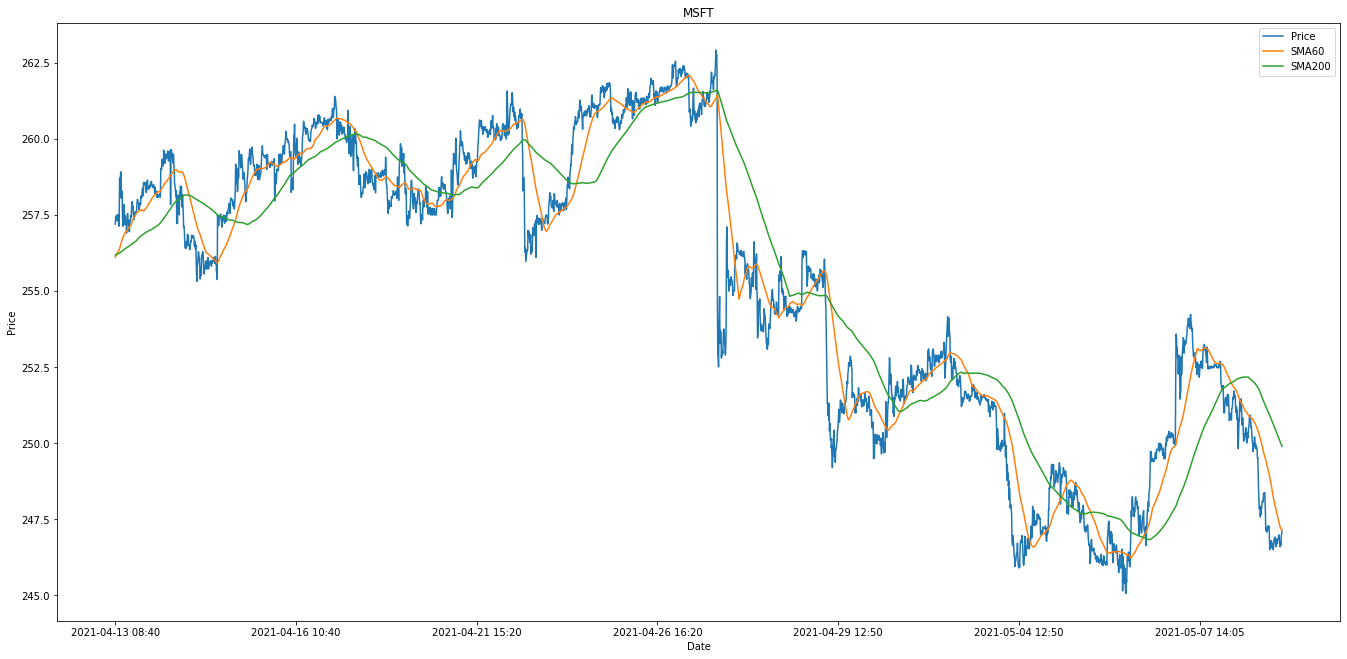

In [ ]:

ls60 = []
ls200 = []
date = []
price = []

print(pricedic)
print(SMA200dic)
def BuildPanda():
  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(i[0])
    ls200.append(float(i[1]["SMA"]))

  for i in date:
    ls60.append(float(SMA60dic["Technical Analysis: SMA"][i]["SMA"]))
    price.append(float(pricedic["Time Series (5min)"][i+":00"]["4. close"]))

  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(datetime.strptime(i[0],'%Y-%m-%d %H:%M'))

def StockGraph():
  size = 0
  
  reversed_df = df.iloc[::-1]
  ax = reversed_df.iloc[size:].plot(x = "Date", y = "Price",figsize=(23, 11))
  reversed_df.iloc[size:].plot(x = "Date", y = "SMA60",ax = ax)
  reversed_df.iloc[size:].plot(x = "Date", y = "SMA200",ax = ax)

  plt.legend()
  plt.title(stock)
  plt.ylabel("Price")
  plt.show()

BuildPanda()

df = pd.DataFrame(list(zip(date,price,ls60,ls200))) 
df.columns = ["Date","Price","SMA60","SMA200"]



StockGraph()



In [ ]:
mode = 1
action = []
profit = 0
money = 10000
holding = 0

def buysell():
  global mode
  global money
  global holding
  global profit
  
  for i in range(len(df.index)-1,-1,-1):
    if df["SMA60"][i] >= df["SMA200"][i]:
      if mode == 1:
        
        action.append("Buy")
        
        
        holding += money//df["Price"][i]
        money -= holding*df["Price"][i]
        
        
        mode = 0
      else:
        action.append("NA")
    else:
      if mode == 0:
        
        action.append("Sell")
        
      
        
        
        money += holding*df["Price"][i]
        holding -= money//df["Price"][i]
        
        mode = 1
      else:
        action.append("NA")
  
  profit = (money - 10000) + holding*df["Price"][0]
buysell()
action.reverse()
df["Action"] = action
print("Profit is: ", profit)

df
        
    

  

Profit is:  -256.22999999999956


,Date,Price,SMA60,SMA200,Action
0,2021-05-10 20:00,247.14,247.1362,249.8996,NA
1,2021-05-10 19:55,247.00,247.1495,249.9264,NA
2,2021-05-10 19:50,246.97,247.1644,249.9539,NA
3,2021-05-10 19:45,246.65,247.1837,249.9831,NA
4,2021-05-10 19:40,246.70,247.2101,250.0124,NA
...,...,...,...,...,...
3224,2021-04-13 09:00,257.50,256.2085,256.2049,Buy
3225,2021-04-13 08:55,257.40,256.1875,256.2012,NA
3226,2021-04-13 08:50,257.45,256.1617,256.1947,NA
3227,2021-04-13 08:45,257.45,256.1353,256.1885,NA


In [ ]:
# """
# Date |  Price  | SMA60 | SMA200 | 
# mode = 0 for buy
# mode = 1 for sell 
# """
# mode = 0 
# def buysell(stock):
#   if stock["SMA60"] > stock["SMA200"]:
  
# 'Hello'

